In [9]:
import numpy as np
import pandas as pd

In [3]:
import pylab as pl

# Cálculo da Primeira Derivada para x = 1, variando deltaX de 0.5 até 0.015625.
## Série de Taylor:

fx_dx = fx + deltaX * (dfx)

## DDS: Downstream Differencing Scheme (Diferença Finita Adiantada)
## UDS: Upstream Differencing Scheme (Diferença Finita Atrasada)
## CDS: Central Diferrencing Scheme (Diferença Finita Central)


In [4]:
x = 1
deltaX = 0.5
deltaXmin = 0.01


dfp_analitics = -np.sin(x)

solution = {}

while deltaX > deltaXmin:
  w = x - deltaX
  p = x
  e = x + deltaX

  fxw = np.cos(w)
  fxp = np.cos(p)
  fxe = np.cos(e)

  dfp_dds = (fxe - fxp) / deltaX
  err_rel_dds = ( (abs(dfp_dds) - abs(dfp_analitics)) / dfp_analitics) * 100

  dfp_uds = (fxp - fxw)/deltaX
  err_rel_uds = ( (abs(dfp_uds) - abs(dfp_analitics)) / dfp_analitics) * 100

  dfp_cds = (fxe - fxw)/(2 * deltaX)
  err_rel_cds = ( (abs(dfp_cds) - abs(dfp_analitics)) / dfp_analitics) * 100

  solution[deltaX] = {'DDS':  dfp_dds, 'UDS': dfp_uds, 'CDS': dfp_cds, 'Analitic': dfp_analitics, 'Erro Relativo DDS': err_rel_dds, 'Erro Relativo UDS': err_rel_uds, 'Erro Relativo CDS': err_rel_cds}
  deltaX = deltaX/2

In [13]:
data = pd.DataFrame.from_dict(solution)

In [14]:
data.to_csv('solution.csv', index = True)

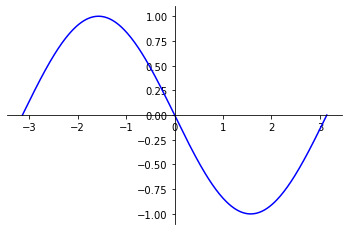

In [ ]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), -np.sin(X)

#pl.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
#          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

#pl.yticks([-1, 0, +1],
#          [r'$-1$', r'$0$', r'$+1$'])

ax = pl.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

pl.plot(X, S, color="blue", linestyle="-", label="cosine")
#pl.plot(X, S)

pl.show()